<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/ai_pm_5%EC%9D%BC%EC%B0%A8_9_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 복습

In [1]:
import pandas as pd
df = pd.read_excel('GOOG.xlsx')

In [2]:
# Date를 날짜와 시간 형식으로 바꿔서 다시 덮어씀
df.Date = pd.to_datetime(df.Date)

In [3]:
# df의 인덱스(행 번호)를 Date로 바꿔라
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

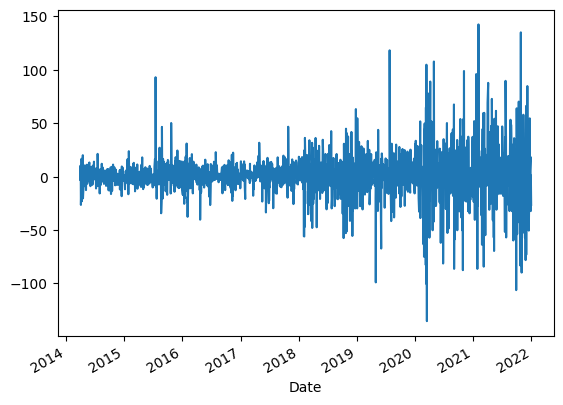

In [4]:
# 전일과 차이 구하기
df.Price.diff().plot()

In [ ]:
# 전일과 차이의 비율 구하기
df.Price.pct_change().plot()

In [5]:
df.Price.asfreq('AS', method='ffill')

Date
2015-01-01     524.96
2016-01-01     758.88
2017-01-01     771.82
2018-01-01    1046.40
2019-01-01    1035.61
2020-01-01    1337.02
2021-01-01    1751.88
Freq: AS-JAN, Name: Price, dtype: float64

In [6]:
df.Price['2016-01-01':'2016-01-07']

Date
2016-01-04    741.84
2016-01-05    742.58
2016-01-06    743.62
2016-01-07    726.39
Name: Price, dtype: float64

<Axes: xlabel='Date'>

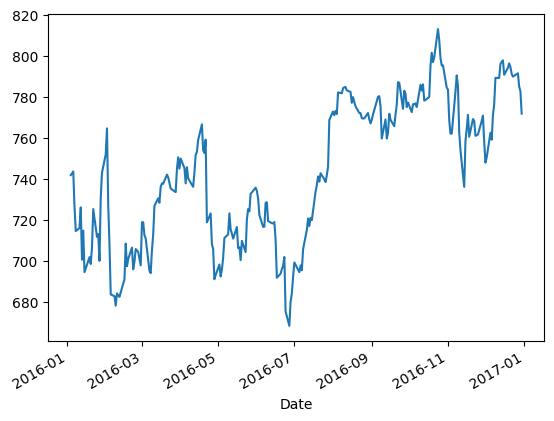

In [7]:
df.Price['2016'].plot()

<Axes: xlabel='Date'>

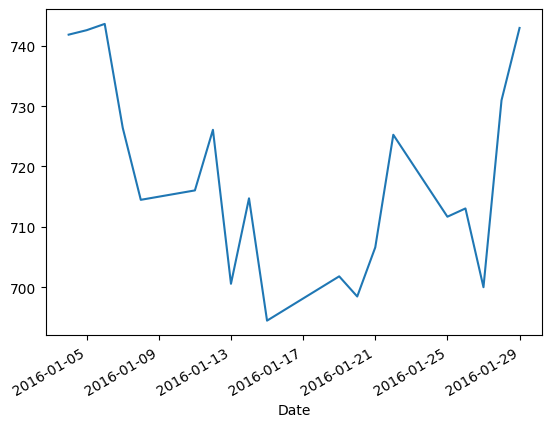

In [8]:
df.Price['2016-01'].plot()

### 리샘플
- 특정 시점 간격으로 데이터를 종합

- 아래는 가격을 매년초(AS)를 기준으로 잘라, 연평균 가격을 계산

<Axes: xlabel='Date'>

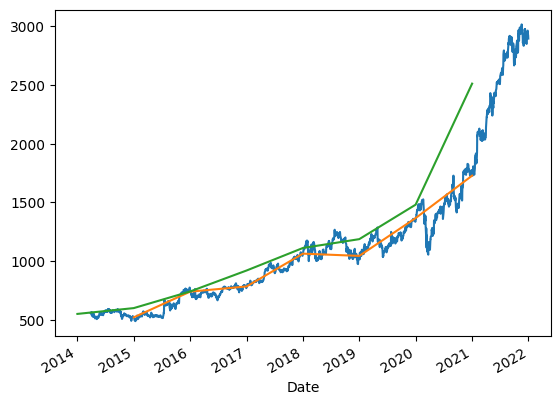

In [10]:
df.Price.plot()     # 매일 매일 가격
df.Price.asfreq('AS', method='bfill').plot()    # 첫 날 가격
df.Price.resample('AS').mean().plot()    # 연평균 가격

### 리샘플(resample)과 이동평균(rolling)의 차이
- 리샘플은 일정 간격으로 구분 (2019년 평균, 2020년 평균 등)
- 이동평균은 모든 날짜를 기준으로 전 후 365일의 평균


<Axes: xlabel='Date'>

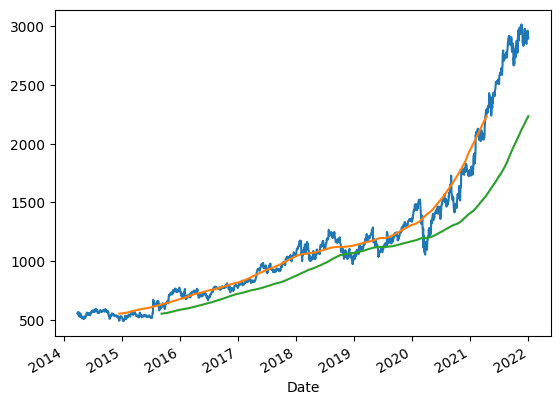

In [12]:
df.Price.plot()
df.Price.rolling(365, center=True).mean().plot() # 가운데 날짜에 이동평균을 표시
df.Price.rolling(365).mean().plot()  # 마지막 날짜에 이동평균을 표시

In [ ]:
df.Price.rolling(365, center=True).mean()   # 앞에서 2일이 비어있고 뒤로 2일이 비어있음

In [14]:
df.Price.rolling(5).mean()   # 앞에서 4일이 비어있음

Date
2014-03-28         NaN
2014-03-31         NaN
2014-04-01         NaN
2014-04-02         NaN
2014-04-03     562.630
                ...   
2021-12-27    2915.110
2021-12-28    2931.296
2021-12-29    2940.432
2021-12-30    2936.646
2021-12-31    2926.794
Name: Price, Length: 1957, dtype: float64

### 자전거 대여소 데이터

In [15]:
data = pd.read_csv('bicycle.csv', index_col='Date', parse_dates=True)  # Date 컬럼을 인덱스로 지정
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [16]:
# 편의를 위해 컬럼 이름 변경
data.columns = ['Total', 'East', 'West']

In [17]:
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<Axes: xlabel='Date'>

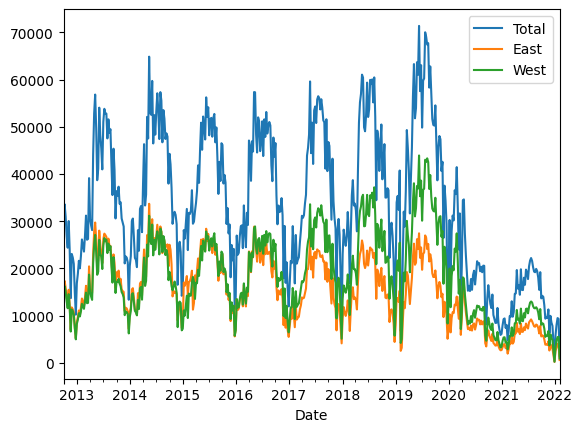

In [18]:
# 주 단위 합계 시각화
data.resample('W').sum().plot()

<Axes: xlabel='Date'>

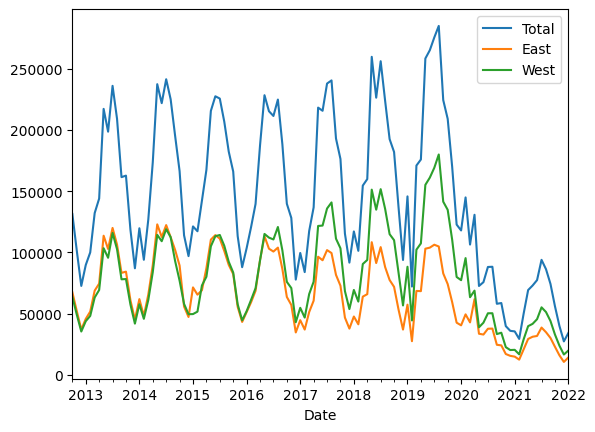

In [19]:
# 월 단위 합계 시각화
data.resample('M').sum().plot()

### 시간대별평균
- 시간별(data.index.time)로 데이터를 모아(groupby) 평균

In [20]:
data.index.hour   # 시분초 중에 시만 표시

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date', length=148022)

In [23]:
data.index.time   # 시분초 전체

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

<Axes: xlabel='time'>

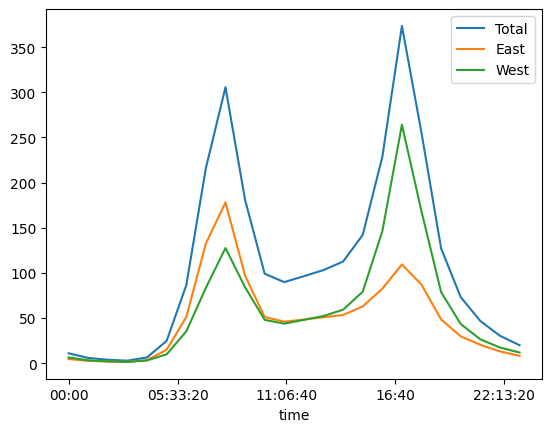

In [21]:
by_time= data.groupby(data.index.time).mean()
by_time.plot()

### 요일별 평균

<Axes: >

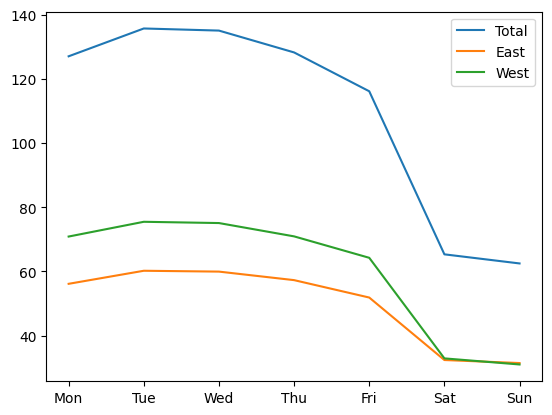

In [22]:
# 요일별 대여량(0: 월요일)
by_week= data.groupby(data.index.dayofweek).mean()
by_week.index= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']   # 보기좋게 index 바꿈
by_week.plot()

<Axes: xlabel='Date'>

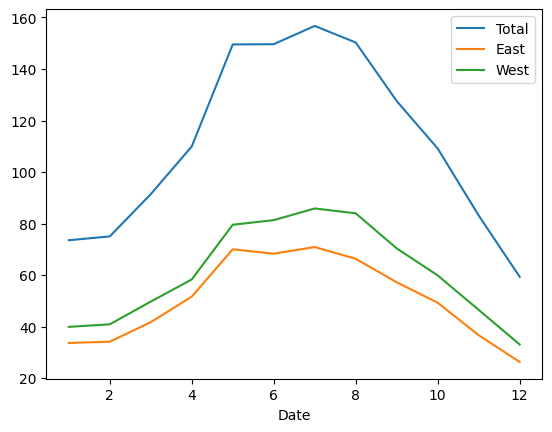

In [24]:
# 월별 대여량
by_month = data.groupby(data.index.month).mean()
by_month.plot()

### 주중과 주말의 비교

<Axes: xlabel='time'>

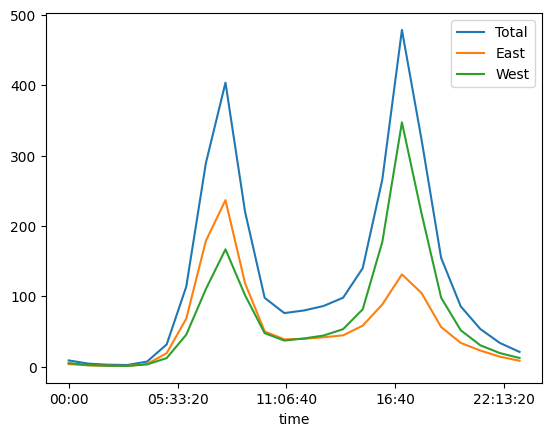

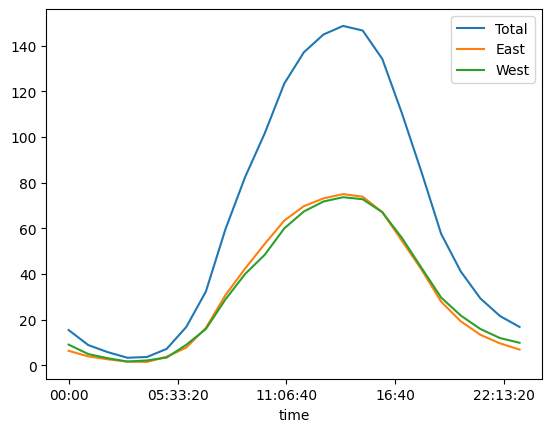

In [29]:
# 주중과 주말, 시간대별로 나누어 평균
import numpy as np
weekend = np.where(data.index.weekday< 5, 'Weekday', 'Weekend')
by_time= data.groupby([weekend, data.index.time]).mean()

by_time.loc['Weekday'].plot()    # loc : location
by_time.loc['Weekend'].plot()

###텍스트분석과자연어처리
텍스트분석(text analytics)
- 텍스트 데이터에서 언어학, 통계학,머신러닝의 기법을 이용
- 의사결정, 조사,연구등을 위해 정보를 추출하고 분석
- 텍스트마이닝text mining
-- 예)고객리뷰를 분석하여 제품을 개선하고 싶다
자연어처리(Natural Language Processing)
- 언어학, 컴퓨터과학,인공지능 등의 한 분야
- 컴퓨터를 이용해 자연어를 자동으로 처리하는 방법
-- 예)고객불만에 자동으로 응대하는 챗봇을 만들고 싶다


### 문서 단어 행렬

#### Bag-of-Words 모형
- 문서를 단어들의 모음(중복집합)으로 이해하는 관점
- 어순, 문장구조는 무시하고 단어의 출현 빈도만으로 파악
- 단순하지만 효과적


#### 단어 통계
- 단어 사용의 패턴에는 여러가지 정보가 포함
- 개인 : "나"를 많이 쓰는가, "너"를 많이 쓰는가?
- 정치 : 대통령 연설문에 어떤 단어가 많이 나오는가?
- 경제 : 기업의 실적 보고에 어떤 단어가 많이 나오는가?
- 제품 : 고객리뷰에 어떤 단어가 많이 나오는가?

#### 문서 단어 행렬(Document Term Matrix)
- 문서별로 단어의 빈도를 정리한 표
- 비정형 데이터인 텍스트를 표 형태로 정형화
- 정형 데이터의 다양한 통계 기법을 적용 가능
- 처리가 단순 ↔ 어순과 맥락을 무시하는 것이 단점

In [36]:
import pandas as pd
df = pd.read_excel('yelp.xlsx')
df.head()
# sentiment가 1이면 긍정, 0이면 부정

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [38]:
# 데이터의 형태 확인
df.shape   # 1000행(리뷰), 2열(review, sentiment)

(1000, 2)

### 문서 단어 행렬 만들기

In [40]:
# 문서 단어 행렬 설정
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')

In [41]:
# 문서 단어 행렬 만들기
dtm = cv.fit_transform(df['review'])

In [42]:
dtm.shape

(1000, 500)

In [ ]:
# 단어 목록 보기
cv.get_feature_names_out()

### 합계

In [ ]:
# 단어별 총 빈도(axis = 0: 열별 합계)
dtm.sum(axis = 0)

### 단어 빈도 데이터 프레임

In [45]:
word_count= pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
    })

### 빈도수로 정렬

In [46]:
# 큰 수부터 정렬
word_count.sort_values('빈도', ascending=False)

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70
...,...,...
291,oven,2
146,finish,2
294,overwhelmed,2
297,pace,2


In [ ]:
# 엑셀 파일로 저장 : 점 세개 버튼을 누르면 다운로드 가능
word_count.to_excel('word_count.xlsx')

### 단어 구름 (Word Cloud)
- 단어 빈도를 시각화하는 방법
- 자주 나오는 단어는 크게,드물게 나오는 단어는 작게 시각화
- 단어의 배치를 통해 특정한 이미지 형태가 되도록 하게도 함


In [47]:
!pip install wordcloud

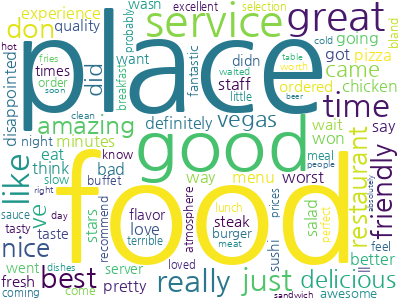

In [49]:
from wordcloud import WordCloud

wc= WordCloud(
    font_path='NanumGothic.ttf',    # 글꼴 파일이 있을 경우
    background_color='white',       # 배경색
    max_words=100,                  # 시각화할 단어 개수
    width=400,                      # 가로크기
    height=300)                     # 세로크기

# word_count를 사전(dict) 형태로 변환
count_dic= dict(zip(word_count.단어, word_count.빈도))

# 단어 구름
cloud = wc.fit_words(count_dic)

# 보기
cloud.to_image()

#### 특정한 모양 & 색으로 그리기
흰 바탕에 그리고 싶은 모양과 색으로 그린 뒤 mask.png로 저장하고 불러온다

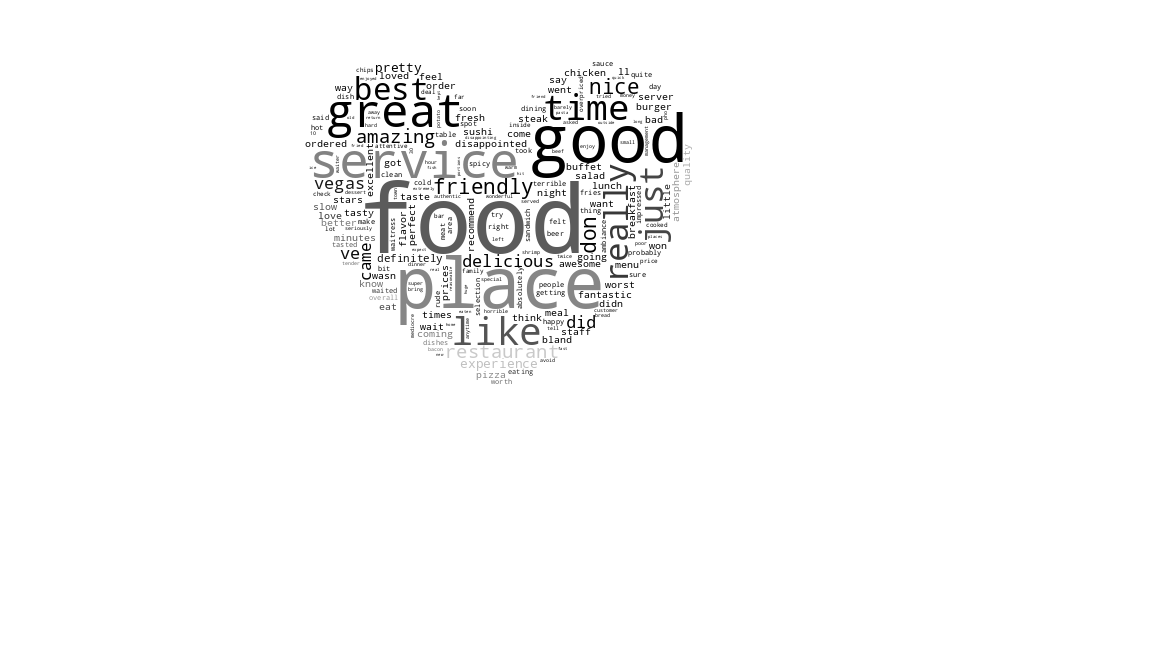

In [51]:
from PIL import Image
import numpy as np

# 그림을 불러온다
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()

### 토큰화
- 문장을 토큰(분석의 단위)으로 쪼개는 것
- 영어의 경우 흔히 단어 단위로 토큰화
-- 단어:홀로쓰일수있는단위
-- The apple went bad → the, apple, went, bad
- 한국어의 경우 흔히 형태소 단위로 토큰화
-- 형태소:의미가 있는 가장 작은 단위
-- 사과가 상했다 → 사과/N,가/J,상하/V, ᄊ/E, 다/E
- 단어분리(word segmentation): 띄어쓰기를 하지 않는 중국어, 일본어 등


#### kiwi 사용법

In [52]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 45.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=7c2910416d0febc534bcbca5708cfc0f8118085e17ae2b71aaab97b1d47b2f39
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [53]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [54]:
kiwi.tokenize("오늘은 자연어 처리를 배우기 좋은 날이다.")


[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='자연어', tag='NNP', start=4, len=3),
 Token(form='처리', tag='NNG', start=8, len=2),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='배우', tag='VV', start=12, len=2),
 Token(form='기', tag='ETN', start=14, len=1),
 Token(form='좋', tag='VA', start=16, len=1),
 Token(form='은', tag='ETM', start=17, len=1),
 Token(form='날', tag='NNG', start=19, len=1),
 Token(form='이', tag='VCP', start=20, len=1),
 Token(form='다', tag='EF', start=21, len=1),
 Token(form='.', tag='SF', start=22, len=1)]

#### 일반적으로 많이 사용하는 품사 태그
- NNG 일반명사
- NNP 고유명사
- VV 동사
- VA 형용사
- XR 어근

In [58]:
# kiwi 명사추출함수
def extract_nouns(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

In [59]:
list(extract_nouns('어제는 홍차를 마시고, 오늘은 커피를 마셨다.'))

['어제', '홍차', '오늘', '커피']

In [65]:
df = pd.read_csv('news_ai.csv')

diwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG')   # '인공지능'을 토큰화 하면 인공, 지능으로 나뉘기 때문에 하나로 되게끔 만듦

cv = CountVectorizer(
    max_features=100,       # 최대 단어 수(빈도순)
    tokenizer=extract_nouns) # 토큰화 방법

dtm= cv.fit_transform(df['본문'])

word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})

word_count.sort_values('빈도', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,단어,빈도
18,기술,279
70,인공지능,247
12,교육,146
2,개발,144
80,제공,116
76,전형,109
45,서비스,107
22,대표,106
84,지원,103
41,산업,101


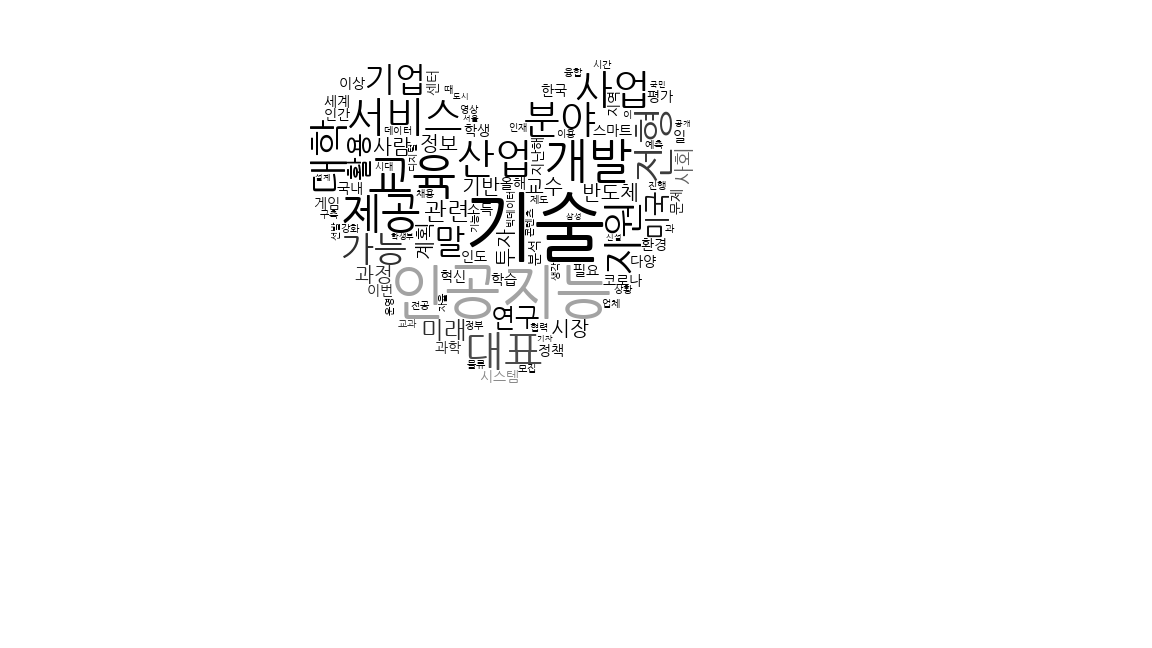

In [66]:
count_dic = dict(zip(word_count.단어, word_count.빈도))
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', font_path='NanumGothic.ttf', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()
